In [1]:
#install/import packages libraries
from sklearn.metrics import make_scorer, accuracy_score # for accuracy
from sklearn.model_selection import train_test_split # for splitting the train-test data
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression # logistic regression
from sklearn.linear_model import LinearRegression  # linear regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report # to create all accuracy matrices
from sklearn.model_selection import GridSearchCV # hyper parameter optimization
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
from sklearn.metrics import accuracy_score # accuracy score / accuracy
from sklearn import preprocessing # EDA


import matplotlib.pylab as pylab # visualization
import matplotlib.pyplot as plt # visualization

from pandas import get_dummies # EDA

import matplotlib as mpl  # visualization
import xgboost as xgb # EDA
import seaborn as sns # visualization
import pandas as pd # EDA
import numpy as np # EDA
import matplotlib # visualization
import warnings # EDA
import sklearn # machine learning
import scipy  # EDA
import json # EDA
import sys # EDA
import csv # EDA
import os # to work with the the work libraries / system related variables

In [2]:
# code to see the output of multiple lines of codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
houseprice_train = pd.read_csv('C://Users//vin//Desktop//Anu//House prices//train.csv')

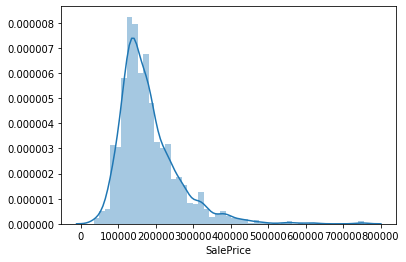

In [4]:
sns.distplot(houseprice_train['SalePrice'])

In [5]:
print("Skewness : %f" % houseprice_train['SalePrice'].skew())
print("Kurtosis : %f" % houseprice_train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


In [6]:
target = np.log(houseprice_train.SalePrice)
print("Skewness : %f" % houseprice_train['SalePrice'].skew())
print("Kurtosis : %f" % houseprice_train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


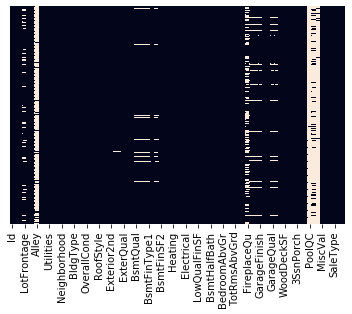

In [7]:
sns.heatmap(houseprice_train.isnull(), yticklabels=False, cbar=False)

In [8]:
houseprice_train.shape
houseprice_train.info()

(1460, 81)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [9]:
houseprice_train.drop(['Id','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [10]:
houseprice_train['LotFrontage'] = houseprice_train['LotFrontage'].fillna(houseprice_train['LotFrontage'].mean()
houseprice_train['MasVnrType'] = houseprice_train['MasVnrType'].fillna(houseprice_train['MasVnrType'].mode()[0])
houseprice_train['BsmtQual'] = houseprice_train['BsmtQual'].fillna(houseprice_train['BsmtQual'].mode()[0])
houseprice_train['BsmtCond'] = houseprice_train['BsmtCond'].fillna(houseprice_train['BsmtCond'].mode()[0])
houseprice_train['BsmtExposure'] = houseprice_train['BsmtExposure'].fillna(houseprice_train['BsmtExposure'].mode()[0])
houseprice_train['BsmtFinType1'] = houseprice_train['BsmtFinType1'].fillna(houseprice_train['BsmtFinType1'].mode()[0])
houseprice_train['BsmtFinType2'] = houseprice_train['BsmtFinType2'].fillna(houseprice_train['BsmtFinType2'].mode()[0])
houseprice_train['GarageType'] = houseprice_train['GarageType'].fillna(houseprice_train['GarageType'].mode()[0])
houseprice_train['GarageFinish'] = houseprice_train['GarageFinish'].fillna(houseprice_train['GarageFinish'].mode()[0])
houseprice_train['GarageQual'] = houseprice_train['GarageQual'].fillna(houseprice_train['GarageQual'].mode()[0])
houseprice_train['GarageCond'] = houseprice_train['GarageCond'].fillna(houseprice_train['GarageCond'].mode()[0])
houseprice_train['Electrical'] = houseprice_train['Electrical'].fillna(houseprice_train['Electrical'].mode()[0])

SyntaxError: invalid syntax (<ipython-input-10-fe27c492fca7>, line 2)

In [11]:
numeric_features = houseprice_train.select_dtypes(include=[np.number])
numeric_features.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
x1                 int64
x2                 int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [12]:
ctgrl_features = houseprice_train.select_dtypes(exclude=[np.number])
ctgrl_features.describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,...,1459,1460,1460,1379,1379,1379,1379,1460,1460,1460
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1151,1454,925,1311,1459,1052,1382,225,1260,1445,...,1334,735,1360,870,605,1311,1326,1340,1267,1198


In [13]:
corr = numeric_features.corr()
print(corr['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
x1               0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
x2               0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


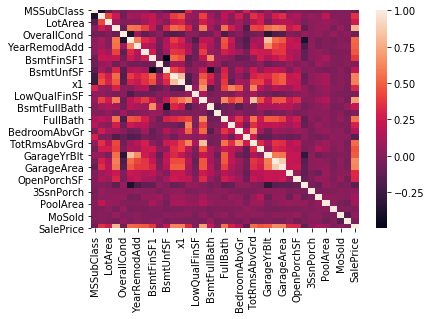

In [14]:
sns.heatmap(corr)

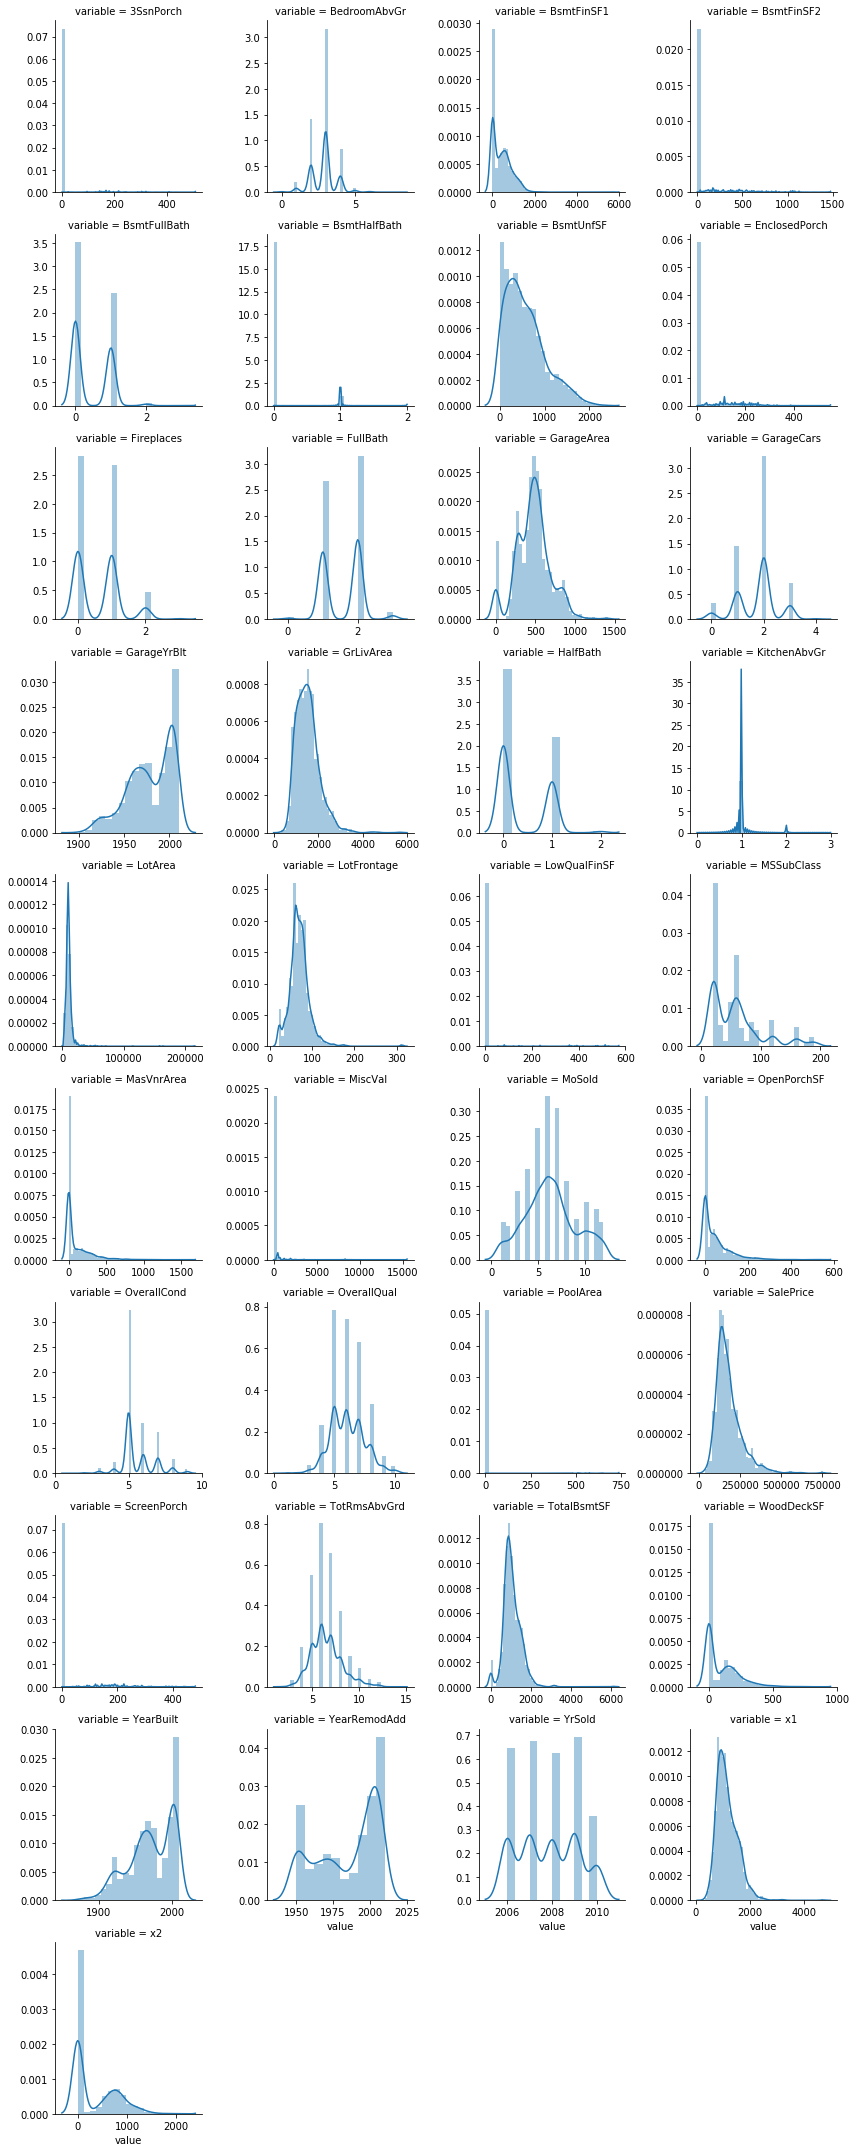

In [15]:
f = pd.melt(houseprice_train, value_vars=sorted(numeric_features))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot,'value')

In [16]:
houseprice_train['3SsnPorch'] = houseprice_train['3SsnPorch'].astype(str)
houseprice_train['BedroomAbvGr'] = houseprice_train['BedroomAbvGr'].astype(str)
houseprice_train['BsmtFinSF1'] = houseprice_train['BsmtFinSF1'].astype(str)
houseprice_train['BsmtFullBath'] = houseprice_train['BsmtFullBath'].astype(str)
houseprice_train['BsmtFinSF2'] = houseprice_train['BsmtFinSF2'].astype(str)
houseprice_train['BsmtHalfBath'] = houseprice_train['BsmtHalfBath'].astype(str)
houseprice_train['BsmtUnfSF'] = houseprice_train['BsmtUnfSF'].astype(str)
houseprice_train['EnclosedPorch'] = houseprice_train['EnclosedPorch'].astype(str)
houseprice_train['Fireplaces'] = houseprice_train['Fireplaces'].astype(str)
houseprice_train['FullBath'] = houseprice_train['FullBath'].astype(str)
houseprice_train['GarageArea'] = houseprice_train['GarageArea'].astype(str)
houseprice_train['GarageCars'] = houseprice_train['GarageCars'].astype(str)
houseprice_train['GarageYrBlt'] = houseprice_train['GarageYrBlt'].astype(str)
houseprice_train['GrLivArea'] = houseprice_train['GrLivArea'].astype(str)
houseprice_train['HalfBath'] = houseprice_train['HalfBath'].astype(str)
houseprice_train['KitchenAbvGr'] = houseprice_train['KitchenAbvGr'].astype(str)
houseprice_train['LotArea'] = houseprice_train['LotArea'].astype(str)
houseprice_train['LotFrontage'] = houseprice_train['LotFrontage'].astype(str)
houseprice_train['LowQualFinSF'] = houseprice_train['LowQualFinSF'].astype(str)
houseprice_train['MSSubClass'] = houseprice_train['MSSubClass'].astype(str)
houseprice_train['MasVnrArea'] = houseprice_train['MasVnrArea'].astype(str)
houseprice_train['MiscVal'] = houseprice_train['MiscVal'].astype(str)
houseprice_train['MoSold'] = houseprice_train['MoSold'].astype(str)
houseprice_train['OpenPorchSF'] = houseprice_train['OpenPorchSF'].astype(str)
houseprice_train['OverallCond'] = houseprice_train['OverallCond'].astype(str)
houseprice_train['OverallQual'] = houseprice_train['OverallQual'].astype(str)
houseprice_train['PoolArea'] = houseprice_train['PoolArea'].astype(str)
houseprice_train['ScreenPorch'] = houseprice_train['ScreenPorch'].astype(str)
houseprice_train['TotRmsAbvGrd'] = houseprice_train['TotRmsAbvGrd'].astype(str)
houseprice_train['WoodDeckSF'] = houseprice_train['WoodDeckSF'].astype(str)
houseprice_train['YearBuilt'] = houseprice_train['YearBuilt'].astype(str)
houseprice_train['YearRemodAdd'] = houseprice_train['YearRemodAdd'].astype(str)
houseprice_train['YrSold'] = houseprice_train['YrSold'].astype(str)
houseprice_train['x1'] = houseprice_train['x1'].astype(str)
houseprice_train['x2'] = houseprice_train['x2'].astype(str)

In [17]:
numeric_features.shape[1]
ctgrl_features.shape[1]

37

38

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]), <a list of 6 Text xticklabel objects>)

C:\Users\vin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


[[None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None, None, None, None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None, None, None],
 [None, None, None, None, None, None, None, None],
 [None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  None,
  No

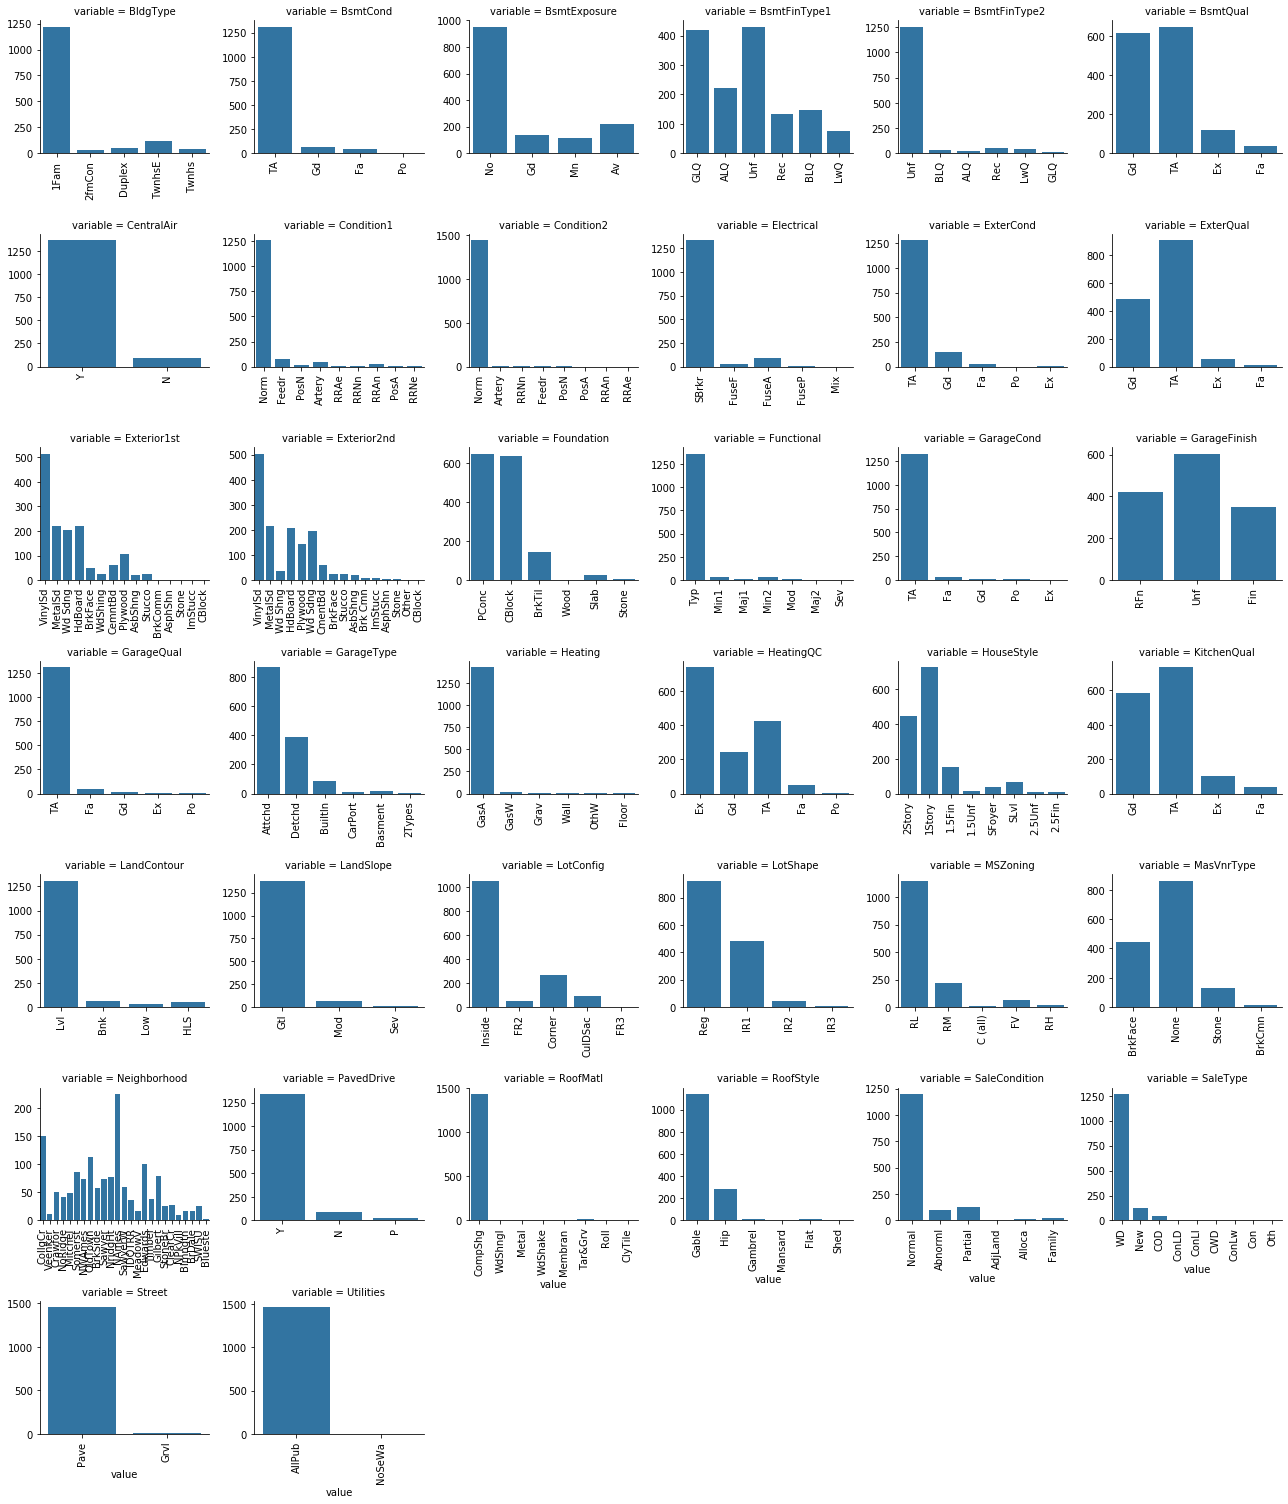

In [18]:
f = pd.melt(houseprice_train, value_vars=sorted(ctgrl_features))
g = sns.FacetGrid(f, col='variable', col_wrap=6, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot,'value')
[plt.setp(ax.get_xticklabels(),rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

In [19]:
houseprice_train = pd.get_dummies(houseprice_train)

In [20]:
independent_var = houseprice_train.drop(['SalePrice'], axis=1)
dependent_var = houseprice_train['SalePrice']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(independent_var, dependent_var, test_size = 0.3, random_state=123)

In [22]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Accuracy on train & test data

In [23]:
predicted_price = regressor.predict(X_test)
#predicted_price[predicted_price < 0] = predicted_price.mean()

In [24]:
new = pd.DataFrame({'SalesPrice':y_test})
new = pd.DataFrame({'Original price': new.SalesPrice, 'predicted price': predicted_price})
new.head()

,Original price,predicted price
147,222500,211185.670438
676,87000,139772.480912
1304,130000,129288.967837
1372,274300,251058.163997
1427,140000,121792.590613


In [27]:
print("accuracy score for train using linearregression is: ",regressor.score(X_train,y_train))
print("accuracy score for test using linearregression is: ",regressor.score(X_test,y_test))

accuracy score for train using linearregression is:  1.0
accuracy score for test using linearregression is:  0.8339483705773174


In [28]:
rfr = RandomForestRegressor()

In [29]:
rfr.fit(X_train,y_train)

C:\Users\vin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [30]:
predicted = rfr.predict(X_test)
print("accuracy score for train using randomforest",rfr.score(X_train,y_train))
print("accuracy score for test using randomforest",rfr.score(X_test,y_test))

accuracy score for train using randomforest 0.9675697589790108
accuracy score for test using randomforest 0.8202682748838419


In [475]:
new2 = pd.DataFrame({'SalesPrice':y_test})
new2 = pd.DataFrame({'Original price': new2.SalesPrice, 'predicted price': predicted})
new2.head()

,Original price,predicted price
147,222500,219500.0
676,87000,145000.0
1304,130000,274970.0
1372,274300,250000.0
1427,140000,126000.0


In [465]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [472]:
predicted=dtr.predict(X_test)
print("accuracy score for train using decision tree",dtr.score(X_train,y_train))
print("accuracy score for test using decision tree",dtr.score(X_test,y_test))

accuracy score for train using randomforest 1.0
accuracy score for test using randomforest 0.6257857381608773


In [474]:
new3 = pd.DataFrame({'SalesPrice':y_test})
new3 = pd.DataFrame({'Original price': new3.SalesPrice, 'predicted price': predicted})
new3.head()

,Original price,predicted price
147,222500,219500.0
676,87000,145000.0
1304,130000,274970.0
1372,274300,250000.0
1427,140000,126000.0


In [478]:
y_pred = regressor.predict(X_test)
print('Linear Regression R squared": %.4f' % regressor.score(X_test, y_test))

Linear Regression R squared": 0.8329


## we can also use below code to cal MAE,MSE,RMSE & Residuals

In [ ]:
metrics.mean_absolute_error(y_test,y_pred)
metrics.mean_squared_error(y_test,y_pred)
np.sqrt(metrics.mean_squared_error(y_test,y_pred))
metrics.explained_variance_score(y_test,y_pred) # this is to cal residuals

## To find coeff for every column use below code after regressor.fit

In [ ]:
pd.DataFrame(regressor.coeff_,X.columns,columns=['coeff'])